In [8]:
## Packages
library(dplyr)
library(stringr)
library(broom)
library(ggplot2)
library(tidyr)
library(gender)
library(stringr)



In [77]:
## Data

CD_results_long <- read.csv("flipped_house_2018_long.csv")

CD_results_wide <- read.csv("flipped_house_2018_wide.csv")


# Add region
states_northeast <- c("CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT")
states_west <- c("AK", "AZ", "CA", "CO", "HI", "ID", "NV", "NM", "OR", "WA", "WY")
states_midwest <- c("IN", "IL", "IA", "KN", "MI", "MN", "MO", "NB", "ND", "OH", "SD", "WI")
states_south <- c("AL", "AK", "DE", "DC", "FL", "GA", "KY", "LA", "MD", "MI", "NC", "OK", "SC", "TN", "TX", "VA", "WV")

CD_results_long <- CD_results_long %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))

# Replace "dataset" with name of your dataset
CD_results_wide <- CD_results_wide %>%
  mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other"))


head(CD_results_long)

head(CD_results_wide)


,X,state,district,candidate,gender,total_votes,vote_share,winner_party,winner_gender,pres_winner,flip,year,party,region
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<chr>
1,1,AK,0,Alyse S. Galvin,female,131199,0.4649710,Republican,male,Trump,FALSE,2018,Democrat,West
2,2,AL,1,Robert Kennedy Jr.,male,89226,0.3677648,Republican,male,Trump,FALSE,2018,Democrat,South
3,3,AL,2,Tabitha Isner,female,86931,0.3842594,Republican,female,Trump,FALSE,2018,Democrat,South
4,4,AL,3,Mallory Hagan,female,83996,0.3621844,Republican,male,Trump,FALSE,2018,Democrat,South
5,5,AL,4,Lee Auman,male,46492,0.2012911,Republican,male,Trump,FALSE,2018,Democrat,South
6,6,AL,6,Danner Kline,male,85644,0.3077089,Republican,male,Trump,FALSE,2018,Democrat,South


,X,state,district,candidate_democrat,candidate_republican,total_votes_democrat,total_votes_republican,vote_share_dem,vote_share_rep,winner_party,year,gender_dem,gender_rep,winner_gender,pres_winner,flip,region
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
1,1,AK,0,Alyse S. Galvin,Don Young,131199,149779,0.4649710,0.5308187,Republican,2018,female,male,male,Trump,FALSE,West
2,2,AL,1,Robert Kennedy Jr.,Bradley Byrne,89226,153228,0.3677648,0.6315633,Republican,2018,male,male,male,Trump,FALSE,South
3,3,AL,2,Tabitha Isner,Martha Roby,86931,138879,0.3842594,0.6138841,Republican,2018,female,female,female,Trump,FALSE,South
4,4,AL,3,Mallory Hagan,Mike Rogers,83996,147770,0.3621844,0.6371731,Republican,2018,female,male,male,Trump,FALSE,South
5,5,AL,4,Lee Auman,Robert Aderholt,46492,184255,0.2012911,0.7977477,Republican,2018,male,male,male,Trump,FALSE,South
6,6,AL,6,Danner Kline,Gary Palmer,85644,192542,0.3077089,0.6917809,Republican,2018,male,male,male,Trump,FALSE,South


In [ ]:
## Flipped districts
# Fill gender for unknowns, only 5
CD_results_long %>%
    filter(flip == TRUE, gender == "Unknown")

CD_results_long[310,"gender"] <- "male"
CD_results_long[310,"winner_gender"] <- "male"
CD_results_long[311,"gender"] <- "female"
CD_results_long[311,"winner_gender"] <- "female"
CD_results_long[716,"gender"] <- "male"
CD_results_long[720,"gender"] <- "male"
CD_results_long[720,"winner_gender"] <- "female"
CD_results_long[721,"gender"] <- "female"



## Tables

In [100]:
CD_results_long %>%
    filter(party == "Democrat", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Republican", flip == TRUE) %>%
    group_by(gender) %>%
    summarize(count = n())


CD_results_long %>%
    filter(party == "Democrat", flip == TRUE) %>%
    group_by(region, gender) %>%
    summarize(count = n()) %>%
    arrange(desc(count))

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(flip, gender) %>%
    summarize(count = n())

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = count / sum(count))


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,13
male,21
Unknown,2


`summarise()` ungrouping output (override with `.groups` argument)



gender,count
<chr>,<int>
female,7
male,24
N/A,2
Unknown,3


`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,gender,count
<chr>,<chr>,<int>
Northeast,male,16
Midwest,female,6
South,female,4
Midwest,male,2
Northeast,Unknown,2
West,female,2
Northeast,female,1
Other,male,1
South,male,1


`summarise()` regrouping output by 'flip' (override with `.groups` argument)



flip,gender,count
<lgl>,<chr>,<int>
FALSE,female,148
FALSE,male,195
TRUE,female,13
TRUE,male,21


`summarise()` ungrouping output (override with `.groups` argument)



gender,count,prop
<chr>,<int>,<dbl>
female,161,0.4270557
male,216,0.5729443


## Graphs

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'flip' (override with `.groups` argument)



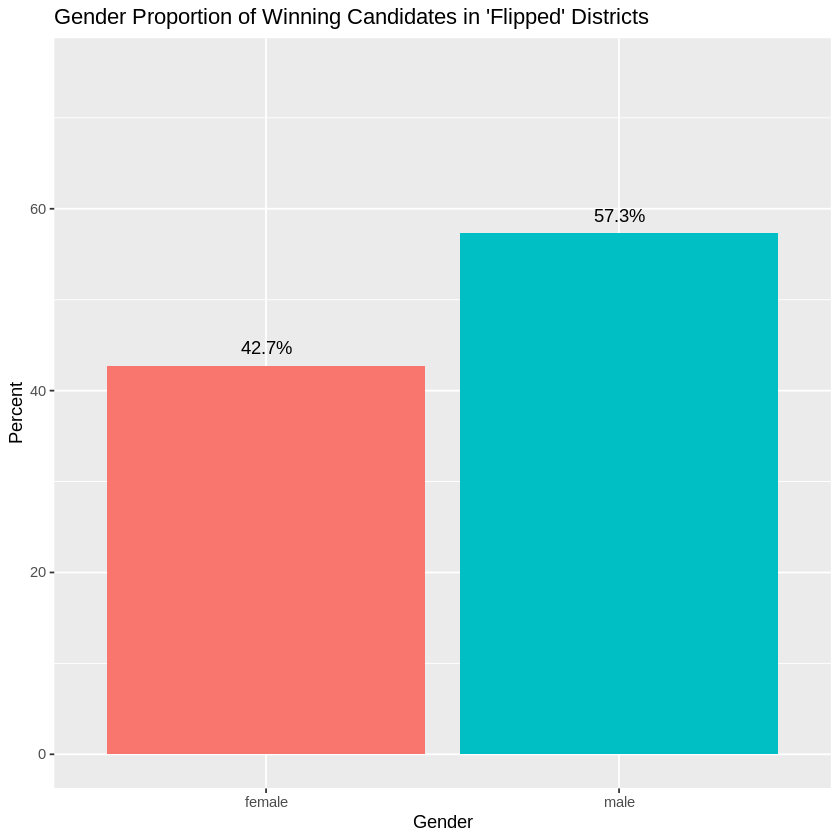

`summarise()` regrouping output by 'flip' (override with `.groups` argument)



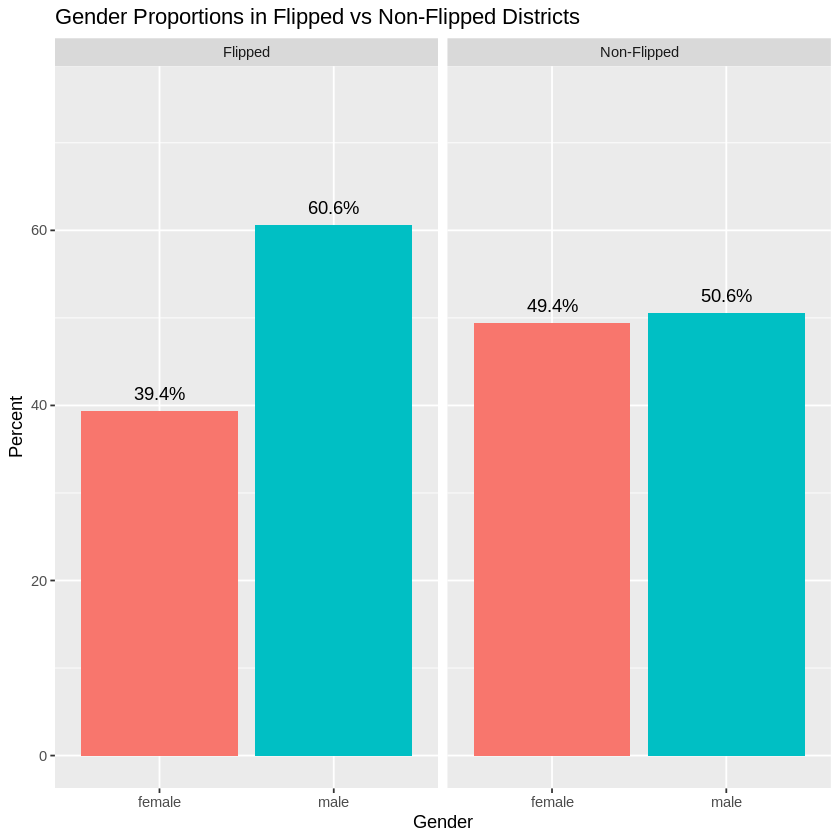

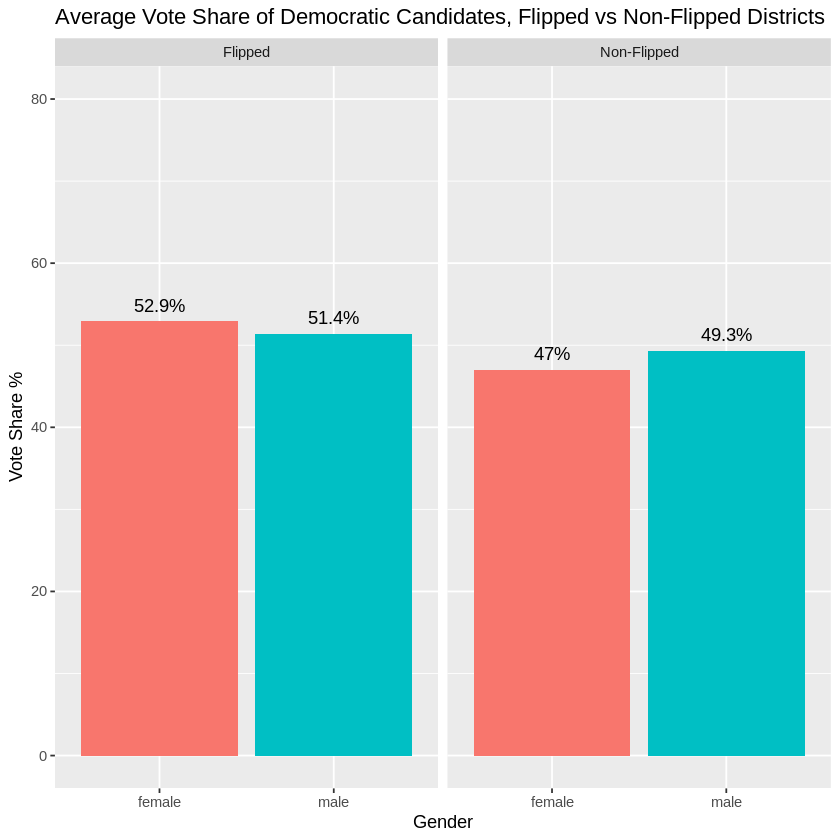

In [116]:
## Visuals
CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    group_by(gender) %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count / sum(count),1)) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%", sep =""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0, 2)) +
        theme(legend.position = "none") + 
        labs(title = "Gender Proportion of Winning Candidates in 'Flipped' Districts",
            x = "Gender",
            y = "Percent") + 
        ylim(0, 75)


CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share < 0.75, pres_winner == "Trump") %>%
    group_by(flip, gender) %>%
    summarize(count = n()) %>%
    mutate(prop = round(100*count / sum(count),1),
          flip = ifelse(flip == FALSE, "Non-Flipped", "Flipped")) %>%
    ggplot(aes(x = gender, y = prop, fill = gender, label = paste(prop, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ flip) + 
        theme(legend.position = "none") + 
        labs(title = "Gender Proportions in Flipped vs Non-Flipped Districts",
            x = "Gender",
            y = "Percent") + 
        ylim(0, 75)
        

CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), vote_share < 0.75, candidate != "No candidate") %>%
    group_by(flip, gender) %>%
    summarize(avg_vote_share = round(100*mean(vote_share),1)) %>%
    mutate(flip = ifelse(flip == FALSE, "Non-Flipped", "Flipped")) %>%
    ggplot(aes(x = gender, y = avg_vote_share, fill = gender, label = paste(avg_vote_share, "%", sep = ""))) + 
        geom_bar(stat = "identity") + 
        geom_text(position = position_nudge(0,2)) + 
        facet_grid(. ~ flip) + 
        theme(legend.position = "none") + 
        labs(title = "Average Vote Share of Democratic Candidates, Flipped vs Non-Flipped Districts",
            x = "Gender",
            y = "Vote Share %") + 
        ylim(0, 80)
# Kind of interesting that there are more males than females in the flipped district winners but females had a higher vote share on average
# Many ways to split this last one, not exactly fair to compare winners to a group that includes losers, but comparing them to non-flipped winners only would include 'safe' seats with high Dem margins




## Models

In [78]:
## Regressions
# Logistic regression, binomial outcome
model1 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female")) %>%
    glm(flip ~ gender, data = ., family = "binomial")
tidy(model1)

model2 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), pres_winner == "Trump", vote_share < 0.75) %>%
    glm(flip ~ gender + vote_share + region, data = ., family = "binomial")
tidy(model2)
# Basic takeaway is that gender has no effect on whether a district flipped or not, possible that lack of controls and small sample size makes it difficult to detect

model3 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), flip == TRUE, vote_share != 1) %>%
    lm(vote_share ~ gender, data = .)
tidy(model3)

model4 <- CD_results_long %>%
    filter(party == "Democrat", gender %in% c("male", "female"), flip == TRUE, vote_share < 0.75) %>%
    lm(vote_share ~ gender + region, data = .)
tidy(model4)



model5 <- CD_results_wide %>%
    filter(gender_dem %in% c("male", "female"), gender_rep %in% c("male", "female"), winner_gender %in% c("male", "female"), pres_winner == "Trump", vote_share_dem < 0.75, vote_share_rep < 0.75) %>%
    glm(flip ~ gender_dem + gender_rep + region, data = ., family = "binomial")
tidy(model5)
# No effect still when adding in gender of opponent as control



    


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.4322629,0.2892746,-8.4081458,4.165431e-17
gendermale,0.2037858,0.3693603,0.5517263,5.811359e-01


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-51.2690598,12.500075,-4.1015000,4.104804e-05
gendermale,-0.3480931,1.054297,-0.3301659,7.412746e-01
vote_share,104.1160296,25.265190,4.1209280,3.773493e-05
regionNortheast,4.8180660,1.781684,2.7042199,6.846496e-03
regionOther,-0.3338241,1.661700,-0.2008931,8.407822e-01
regionSouth,-0.4390017,1.168522,-0.3756898,7.071475e-01
regionWest,-0.5229404,1.596570,-0.3275399,7.432596e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.52917468,0.01275857,41.4760279,1.001306e-28
gendermale,-0.01528165,0.01638868,-0.9324519,3.583090e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.54328622,0.01797086,30.2315157,2.335689e-22
gendermale,-0.01437600,0.02422043,-0.5935483,5.577545e-01
regionNortheast,-0.01482315,0.02658392,-0.5575982,5.817128e-01
regionOther,-0.02769026,0.05391257,-0.5136142,6.116996e-01
regionSouth,-0.03400713,0.02730959,-1.2452450,2.237410e-01
regionWest,-0.01629911,0.03246219,-0.5020952,6.196708e-01


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.2467221,0.6700243,-0.3682285,7.127028e-01
gender_demmale,-0.1468747,0.5376516,-0.2731781,7.847163e-01
gender_repmale,-1.5366096,0.6149715,-2.4986679,1.246611e-02
regionNortheast,2.9776033,0.7631627,3.9016626,9.553424e-05
regionOther,-1.0425196,1.1335057,-0.9197304,3.577137e-01
regionSouth,-0.8877944,0.6201601,-1.4315568,1.522707e-01
regionWest,-0.6305544,0.7638227,-0.8255245,4.090739e-01
